In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')

## Outcomes and Random Variables

In [31]:
die = pd.DataFrame([1,2,3,4,5,6])

In [32]:
sum_of_dice = die.sample(2, replace=True).sum().loc[0] # 2 dice
print('Sum of dice is ', sum_of_dice)

Sum of dice is  6


In [33]:
# rolling dice 
trial = 50
result = [die.sample(2,replace=2).sum().loc[0] for i in range(trial)]
result[:10]

[4, 10, 3, 8, 4, 5, 6, 6, 7, 4]

* X : the sum of faces $\rightarrow$ random variable 
* Outcomes $\rightarrow$ result

## Frequency and Distributions

In [34]:
die = pd.DataFrame(range(1,7))
trial = 50
results = [die.sample(2, replace=True).sum().loc[0] for i in range(trial)]
results[:10]

[5, 7, 10, 4, 2, 2, 8, 6, 10, 6]

In [35]:
freq = pd.DataFrame(results)[0].value_counts() # count values
sort_freq = freq.sort_index() # sort index
sort_freq

2     2
3     1
4     4
5     4
6     7
7     8
8     6
9     4
10    8
11    3
12    3
Name: 0, dtype: int64

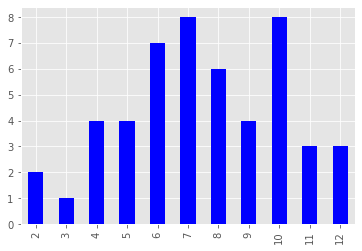

In [36]:
sort_freq.plot(kind='bar', color='blue');

Relative freq = freq / no.of trials

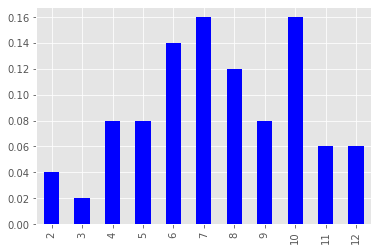

In [37]:
relative_freq = sort_freq/trial
relative_freq.plot(kind='bar', color='blue');

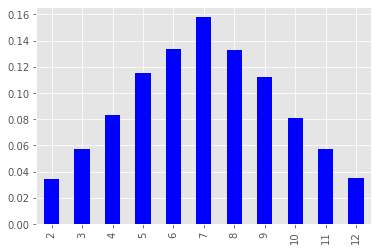

In [38]:
trial = 2000
results = [die.sample(2, replace=True).sum().loc[0] for i in range(trial)]
results[:10]
freq = pd.DataFrame(results)[0].value_counts() # count values
sort_freq = freq.sort_index() # sort index
relative_freq = sort_freq/sort_freq.sum()
relative_freq.plot(kind='bar', color='blue');

## Distibution table

In [39]:
X_distri = pd.DataFrame(index = range(2,12))
X_distri['Prob'] = range(2,12)
X_distri['Prob'] = X_distri['Prob']/36

* $Mean(or Expectation) = \sum_{i} p_{i}x_{i}$
* $Variance = \sum_{i}(x_{i}-Mean)^{2}p_{i}$ 

In [40]:
Mean = (X_distri.index*X_distri['Prob']).sum()
Var = (((X_distri.index - Mean)**2)*X_distri['Prob']).sum()
print(Mean, Var)

14.027777777777779 82.70972650891635


## Model of Distribution

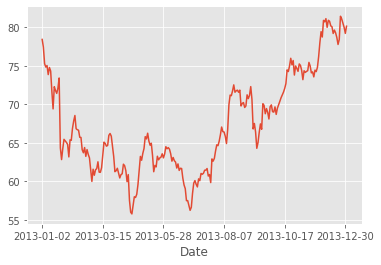

In [43]:
aap1 = pd.read_csv('./data/apple.csv').set_index('Date')
aap1.loc['2012-8-01':'2013-8-01', 'Close'].plot();
# big drop in apple's stock price August 2012 to May 2013
# Probability of dropping over 40% ???

### Log daily return

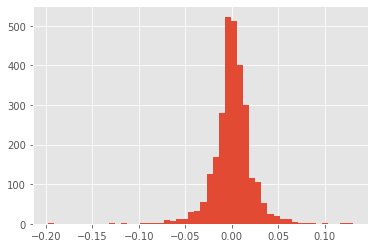

In [45]:
aap1['LogReturn'] = np.log(aap1['Close']).shift(-1) - np.log(aap1['Close'])
aap1['LogReturn'].hist(bins=50);
# similar to Norm.dist

import scipy.stats for:
* Probability Density Function (PDF)
* Cumulative Distribution Function (CDF)

In [46]:
from scipy.stats import norm

In [47]:
density = pd.DataFrame()
density['x'] = np.arange(-4,4,0.001)
density['pdf'] = norm.pdf(density['x'],0,1) # get pdf N(0,1)
density['cdf'] = norm.cdf(density['x'],0,1) # get cdf N(0,1)

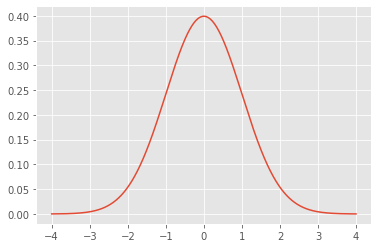

In [50]:
plt.plot(density['x'], density['pdf']);

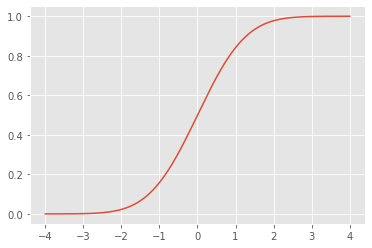

In [51]:
plt.plot(density['x'], density['cdf']);

In [53]:
mu = aap1['LogReturn'].mean()
sigma = aap1['LogReturn'].std(ddof=1)
print(mu, sigma)

0.000975467759150088 0.020045447615854962


## what is the chance of losing over 5% in a day?

In [54]:
denApp = pd.DataFrame()
denApp['x'] = np.arange(-0.1,0.1, 0.001)
denApp['pdf'] = norm.pdf(denApp['x'], mu, sigma)

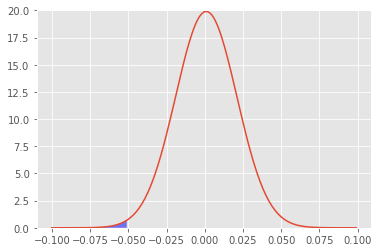

In [67]:
plt.ylim(0,20)
plt.plot(denApp['x'], denApp['pdf'])
plt.fill_between(denApp['x'], 
                 0, 
                 denApp['pdf'],
                 where=denApp['x'] <= -0.05, 
                 facecolor='blue',
                 alpha=0.5);

In [68]:
prob_return1 = norm.cdf(-0.05,mu,sigma)
print('The probability is ', prob_return1) #P(Daily return < -5%)

The probability is  0.005495344250959507


### How about probability of dropping over 40% in 1 year (220 trading days)?

P(Drop over 40% in 220 days) <br/><br/>
Assumption: <br/>
Sum of independent normal random variables:
* mean:<br/>
$\mu_{X_{1}+X_{2}+ X_{3}+...+ X_{n}} = \mu_{X_{1}} + \mu_{X_{2}} + \mu_{X_{3}} + ... +\mu_{X_{n}}$ <br/><br/>
* variance:<br/>
$\sigma^{2}_{X_{1}+X_{2}+ X_{3}+...+ X_{n}} = \sigma^{2}_{X_{1}} + \sigma^{2}_{X_{2}} + \sigma^{2}_{X_{3}} + ... + \sigma^{2}_{X_{n}}$

In [69]:
mu220 = 220* mu
sigma220 = 220**0.5*sigma
print('The probability of dropping over 40% in 220 days is ', norm.cdf(-.4, mu220, sigma220))

The probability of dropping over 40% in 220 days is  0.019361015454142632


## Finding quantiles

VaR (Value at Risk): estimates how much a set of investment might lose with a given probability.

In [70]:
norm.ppf(0.05, mu, sigma) # 95% VaR

-0.031996359455654697

With 5% chance, the daily return is worse than -3%

Is it safe to use Normal Distribution?